In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)

## Support Vector Machines

A ML algorithm for both classification and regression problem, to model either linear or non-linear phenomena, well suited for mid-size data sets.

The training data is given by $m$ points $(x^{(1)},y^{(1)}),...,(x^{(m)},y^{(m)})$, where the labels $y$ are in $\{-1,+1\}$.

### Binary Classification

The data is _linearly separable_ when there is a hyperplane (e.g., a line in the plane, or a plane in the space) that is able to leave class +1 on one side of the hyperplane and class -1 on the other side of the hyperplane.

For linearly separable sets, SVM finds the hyperplane that leaves the largest possible margin on both sides of it, until the first example (from either class) is encountered.

Of course the data of two classes is not always linearly separable. Sometimes the data cannot be linearly separable.

If the data is linearly separable, in $\mathbb{R}^n$ ($n$-features), then SVM finds an $n$-dimensional vector $w$ and a constant $b$ such that all examples $x^{(i)}$ with label $+1$ have $w^T \cdot x^{(i)} + b \geq 1$ and those with label $-1$ have $w^T \cdot x^{(i)} + b \leq -1$.

Moreover, to classify new points (not in the training set), the classifier has the following form:

$$ \text{estimated label } y = \begin{cases} 
      -1 & \text{if } w^T \cdot x + b<0 \\
      +1 & \text{if } w^T \cdot x + b\geq 0 
   \end{cases}
$$

The decision boundary, that separates both classes is the set of points where $w^T \cdot x + b=0$, and the margins (dashed lines) correspond to $w^T \cdot x + b=1$ and $w^T \cdot x + b=-1$.

The vector $w$ is perpendicular to the hyperplane that separaters both classes.

As an example, we continue working with the Iris dataset, to classify points into _setosa_ or _versicolor_

In [3]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The following example shows on the left:

- Dashed line does not separate both clases

- The two continuous lines do separate both classes, but are not optimal

On the right:

- The black continuous is the SVM decision boundary

- The two black dashed lines indicate the _margin_ (the margin is in fact the distance between the dashed line and the decision boundary)

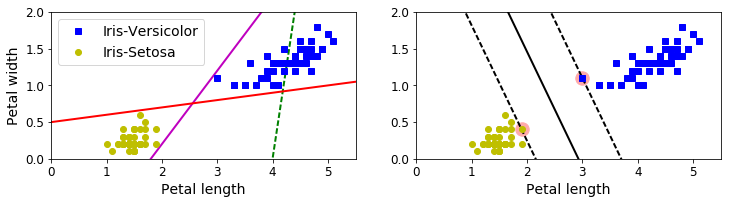

In [5]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

#### Support vectors

The fact that there are examples (vectors, in 2-dimensional space in this case) right on the dashed lines is not by chance. It is by construction of the SVM solution.

These vectors are called the _support vectors_. If _setosa_ examples were to the left of the dashed line going through the _setosa_ support vector (or if _versicolor_ examples were to the right of the dashed like to the right of the _versicolor_ support vector), the solution would be exactly the same as above.

The solution would have been different only if there were new examples within the dashed lines.


#### Scaling

SVM is sensitive to feature scaling, which is convenient to use.

#### Soft Margin Classification

The example described above is called _hard margin classification_, which occurs when there are no examples within the dashed lines.

A _soft margin classification_ is when some violations of this are allowed, that is, some examples are allowed to be within the dashed lines.

In this case, the solution finds a balance between the margin (the larger the better) and the number of violations (the fewer the better).

The Scikit-Learn implementation of SVM controls this balance with a hyperparameter _C_. When C is small, the margin is bigger but more violations occur. When C is large, the margin is smaller and less violations happen. 

Example:

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [10]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline((
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ))
scaled_svm_clf2 = Pipeline((
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ))

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))))

In [11]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

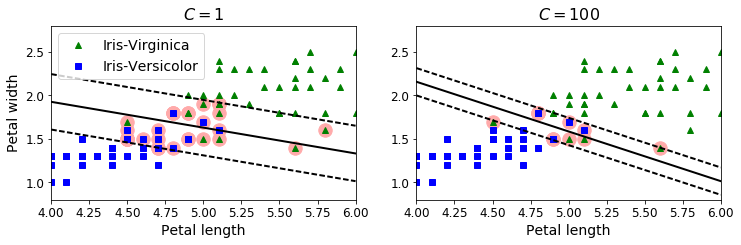

In [12]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

Note that the _violations_ are not necessarily misclassifications. A violation can be still on the correct side of the hyperplane. However, all misclassifications are necessarily violations.

C can be used also as a regularizing parameter. Lower values of C correspond to allowing more violations, that is, trying less harder to fit the data, which means less variance, higher bias. So if SVM overfits, lower value of C may help.

### Nonlinear SVM classification

Some datasets that are not linearly separable can become linearly separable by adding features. 

As an example, the data on the left is not linearly separable, but adding a second feature $x_2 = x_1^2$ it becomes linearly separable.

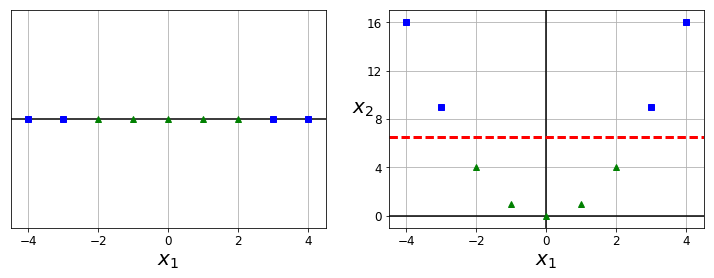

In [14]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

Although adding polynomial features may work in some cases, complex patterns cannot often be separated by adding low degree polynomials, and adding high degree polynomials can increase the number of features significantly.

#### Polynomial Kernel

A better approach, called _kernel trick_, works as if many new features (non-linear) are added, and then SVM is performed, but without actually having to add the features manually.

The idea is to apply a feature transformation, from the original feature space, into a higher dimensional feature space, where usual SVM is applied. But again, the feature transformation is not made explicit by the user or the algorithm. The algorithm works _as if_ the feature transformation occurs (this is the _kernel trick_). 

More concretely, to perform SVM one needs to _do a bit of geometry_ (in order to find the support vectors, the margin and the decision boundary). This is done using an operation between vectors called _inner product_, with which angles and distances can be computed (to find the decision boundary). The inner product between vectors $u,v$ is denoted $\langle u,v\rangle = \sum_i u_i v_i = u^T \cdot v$. Now, imagine that without actually making the feature transformation, one could magically do geometry in the new high dimensional feature space. If that were the case, then one could solve SVM in the new feature space. That's exactly what the _kernel trick_ allows: a kernel is a function $k: X \to \mathbb{R}$, such that $$\langle \phi(x) , \phi(x') \rangle= k(x,x')$$

where $\phi$ is the transformation from the original space, to the highly dimensional (and unknown) new feature space. One does not need to know what $\phi$ is. One only needs to know what kernel is using. Then there is Mercer's Theorem, that guarantees that for any kernel $k$, there is such $\phi$. What the equation above says is how to compute inner product in the new feature space, without actually going there. To compute the inner product between the transformation of $x$ and $x'$, simply do $k(x,x')$.

There are  (infinitely) many possible kernels, and the kernel chosen for SVM becomes then a hyperparameter (although it is a function, not a number). To be a kernel, $k$ has to satisfy certain properties, but there any many such functions already known and well studied. Polynomial kernels are just one type of kernels.

Example: two solutions with different polynomial kernels.

The polynomial kernel is $$k(x,x') = (\langle x,x' \rangle+r)^d$$

where $r$ is a coefficient and $d$ is the degree.

Like before, $C$ is the regularization coefficient.

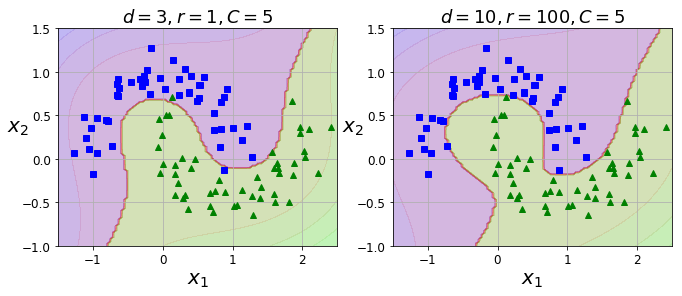

In [24]:
from sklearn.svm import SVC

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


poly_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ))
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ))
poly100_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

#### Gaussian Kernel

The gaussian kernel is $$k(x,x') = e^{-\gamma ||x-x'||^2}$$

and using it is analogous to replacing the original features by as many features as training points (that's usually a lot), each feature induced by a training point $x$ measuring how similar each training point is to $x$.

The parameter $\gamma$ needs to be calibrated, for which cross-validation can be used. From the formula it can be seen that the larger the value of $\gamma$ the bigger the impact of the similarity.

Example: 

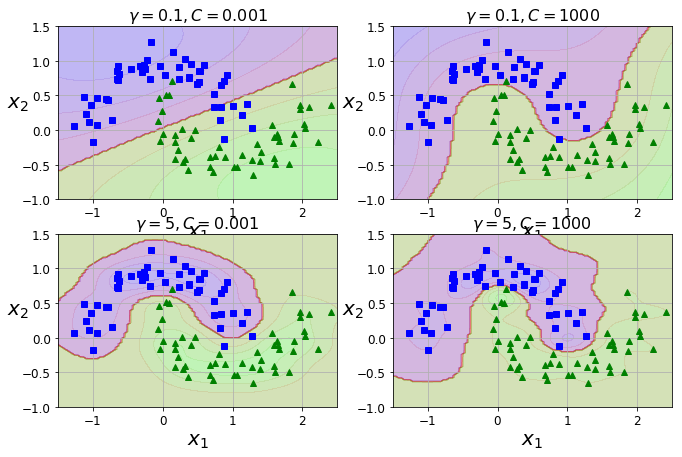

In [25]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ))
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

#### SVM for Regression

In SVM for regression (estimation of a continuous variable) the goal of the learner is somehow reversed: instead of trying to find the parallel dashed lines as far as possible and containing few points between them, now the goal is to find parallel dashed lines that are close to each other and contain as many points as possible.

Analogous to $C$ now the parameter that controls how appart the dashed lines are and how many points between them is $\epsilon$.

Example: the following show 2 solutions of SVM for data generated that is approximately linear.

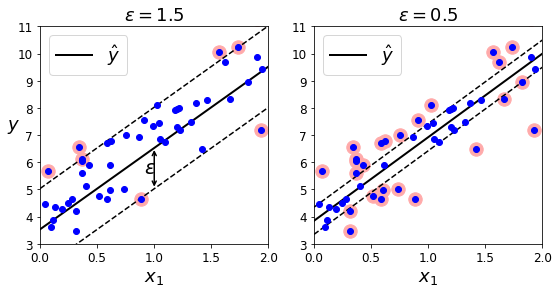

In [26]:
# DATA
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# MODEL
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

# SOLUTIONS
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])



def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

#### Non-linear SVM Regression

SVM for regression can also be used with non-linear kernels.

Example: using non-linear data, and all parameters the same, except for the regularization C, we see how lower C gives lower variance (higher bias)

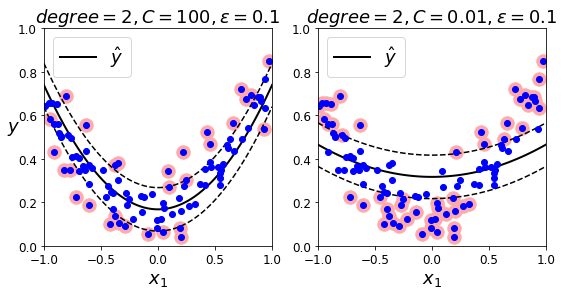

In [29]:
# DATA
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

# MODEL
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

# SOLUTIONS
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

# PLOTS
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

### How SVM works

The linear SVM classifier has the following form: 

$$ \begin{cases} 
      -1 & \text{if } w^T \cdot x + b<0 \\
      +1 & \text{if } w^T \cdot x + b\geq 0 
   \end{cases}
$$

The binary classes for SVM are represented with $\{+1,-1\}$. 

The decision boundary, that separates both classes is the set of points where $w^T \cdot x + b=0$, and the margins (dashed lines) correspond to $w^T \cdot x + b=1$ and $w^T \cdot x + b=-1$.

The SVM algorithm finds $w$ and $b$, so that the margin is as wide as possible while avoiding margin violations (hard margin) or limiting them (soft margin).

Now suppose $x^{+}$ is a positive support vector and $x^{-}$ is a negative support vector. Then: 

$$w^T \cdot x^{+} + b =+1 $$

$$w^T \cdot x^{-} + b =-1 $$

That means $x^{+}$ lies on one dashed line, and $x^{-}$ on the other dashed line (both dashed lines are parallel). The decision boundary is also parallel to them. And by construction, $w$ is perpendicular to the 3 lines. By geometry, it follows that the distance between the two dashed lines, that is the _margin_ is equal to: $$\frac{w}{||w||}\cdot (x^{+} - x^{-}) = \frac{w^T \cdot (x^{+} - x^{-})}{||w||} = \frac{w^T \cdot x^{+} - w^T \cdot x^{-}}{||w||} = \frac{1-b - (-1-b)}{||w||} = \frac{2}{||w||}$$

Since this is the margin, and we want it as large as possible, this is the same as minimizing $||w||$, which is the same as minimizing $\frac{1}{2} ||w||^2 = \frac{1}{2} w^T \cdot w$. 

On the other hand, since this is hard margin, all positive examples should satisfy $w^T \cdot x+b\geq 1$ and all negative examples $w^T \cdot x+b\leq -1$, which can be concisely written as: $y(w^T \cdot x+b)\geq 1$, so the problem of finding $w,b$ can be expressed as 

$$ \text{Hard-margin:} \begin{cases} 
      \text{minimize} & \frac{1}{2}w^T \cdot w \\
      \text{subject to} & y^{(i)}(w^T \cdot x^{(i)}+b)\geq 1 \text{ for every training example } 
   \end{cases}
$$

The soft-margin formulation just gives _slacks_ $\xi^{(i)}\geq 0$ to the constraints (to tolerate violations) but at the same time they are penalized: 

$$ \text{Soft-margin:} \begin{cases} 
      \text{minimize} & \frac{1}{2}w^T \cdot w +C\sum_{i=1}^m \xi^{(i)} \\
      \text{subject to} & y^{(i)}(w^T \cdot x^{(i)}+b)\geq 1 - \xi^{(i)} \text{, for every $i$ training example } 
   \end{cases}
$$

#### Quadratic Programming

Both hard and soft margin approaches are a particular case of a well known optimization problem called quadratic programming. In its most general formulation, quadratic programming looks like:

$$ \text{Hard-margin:} \begin{cases} 
      \text{minimize} & \frac{1}{2}u^T \cdot H \cdot u + f^T \cdot u \\
      \text{subject to} & A \cdot u\leq d 
   \end{cases}
$$

where $u$ is a $q$-dimensional vector being optimized, $H$ is a symmetric $q \times q$ matrix, $f$ is an $q$-dimensional vector,  $d$ is an $m$ dimensional vectors, and $A$ is a $m \times q$ matrix.

Doing the appropriate substitutions, the hard-margin formulation can be seen as a QP problem:


- $q=n+1$, the number of features + 1, to include the bias term $b$

- $u = (b,w_1,...,w_n)$

- $m$ is  the number of training points

- $H$ is the identity matrix but with $H_{11}=0$, because the objective function does not include the the bias term

- $f$ is just the $0$ vector

- $d$ is the vector with -1's everywhere

- The matrix $A$ has as $i$-th row the: $-y^{(i)}z^{(i)}$, where $z^{(i)}$ is the vector that starts with $1$, and is followed by $x^{(i)}$

Once a solution $u$ for the QP problem is found, then the SVM solution is $b=u_0$ and $w=(u_1,...,u_n)$.

This formulation is called _primal_. There is an equivalent formulation, called _dual_, which allows to be extended to using non-linear kernels.

#### Dual problem

The dual formulation is:

$$ \text{Dual:} \begin{cases} 
      \text{minimize with respect to $\alpha$:} & \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i,j=1}^m y^{(i)}y^{(j)}\alpha_i\alpha_j \langle x^{(i)} , x^{(j)\rangle} \\
      \text{subject to, for every $i$:} & \alpha_i \geq 0, \text{and } \sum_{i=1}^m \alpha_i y^{(i)} =0 
   \end{cases}
$$

Once the solution $\alpha$ for the dual is found, it can be recovered in terms of $w$ and $b$, to build the classifier:

$$w = \sum_{i=1}^m \alpha_i y^{(i)} x^{(i)}$$

$$ b = \frac{1}{n_s} \sum_{i: \alpha_i>0} (1-y^{(i)}(w^T \cdot x^{(i)}))$$ 

where $n_s$ is the number of vectors with $\alpha_i>0$, and then one can have the classifier:

$$ y = \begin{cases} 
      -1 & \text{if } w^T \cdot x + b<0 \\
      +1 & \text{if } w^T \cdot x + b\geq 0 
   \end{cases}
$$

This works for the linear case.

#### Non linear case (kernels)

Now, if a kernel $k(x,x')$ is used, which as mentioned earlier gives the same value as $\langle \phi(x)^T, \phi(x') \rangle$, where $\phi$ is a transformation from the original feature space, to a higher dimensional space, then the same Dual problem can be solved, but replacing $\langle x^{(i)}, x^{(j)}\rangle$ by $k(x^{(i)},x^{(j)})$

The problem, however, is that $w$ and $b$ cannot be re-constructed in practice as showed above for the linear case, because that would require knowing $\phi(x^{(i)})$, which is unknown. However, the classifier can still be reconstructed, thanks to the kernel trick again.

Even if $\phi$ is unknown and in practice $w$ and $b$ cannot be reconstructed like in the linear case, we can still write the formal equations, because $\phi$ exists even though it is unknown (Mercer's Theorem)

$$w = \sum_{i=1}^m \alpha_i y^{(i)} \phi(x^{(i)})$$

$$ b = \frac{1}{n_s} \sum_{i: \alpha_i>0} (1-y^{(i)}(w^T \cdot \phi(x^{(i)})))$$ 

and now we go ahead and evaluate the classifier on an example $x$, by looking at the value of $w^T\phi(x)+b$

$$ y = \begin{cases} 
      -1 & \text{if } w^T \cdot \phi(x)+b<0 \\
      +1 & \text{if } w^T \cdot \phi(x)+b\geq 0 
   \end{cases}
$$

But how can we compute $w^T \cdot \phi(x)+b$ if $\phi$, $w$ and $b$ are all unknown? With the kernel trick!

First let's look at $b$ more carefully, and substitute $w$

$$ b = \frac{1}{n_s} \sum_{i: \alpha_i>0} (1-y^{(i)}(w^T \cdot \phi(x^{(i)}))) = \frac{1}{n_s} \sum_{i: \alpha_i>0} \Big(1-y^{(i)}\Big(  \Big( \sum_{j=1}^m \alpha_j y^{(j)} \phi(x^{(j)})  \Big)^T\phi(x^{(i)})\Big)\Big) = $$

$$ \frac{1}{n_s} \sum_{i: \alpha_i>0} \Big(1-y^{(i)} \sum_{j=1}^m \alpha_j y^{(j)} \big( \phi(x^{(j)})^T \cdot \phi(x^{(i)})\big)  \Big) = \frac{1}{n_s} \sum_{i: \alpha_i>0} \Big(1-y^{(i)} \sum_{j=1}^m \alpha_j y^{(j)} \langle \phi(x^{(j)}), \phi(x^{(i)})\rangle  \Big) = $$

$$ \frac{1}{n_s} \sum_{i: \alpha_i>0} \Big(1-y^{(i)} \sum_{j=1}^m \alpha_i y^{(j)} k(x^{(j)},x^{(i)})  \Big)  $$

and the last expression is all known and computable, so $b$ is known.

Likewise, although $w$ will not be computed, we can still compute $w^T \cdot \phi(x)$:

$$ w^T \cdot \phi(x) = \Big( \sum_{i=1}^m \alpha_i y^{(i)} \phi(x^{(i)}) \Big)^T \cdot \phi(x) = \sum_{i=1}^m \alpha_i y^{(i)} \big( \phi(x^{(i)})^T \cdot  \phi(x) \big)= \sum_{i=1}^m \alpha_i y^{(i)} \langle \phi(x^{(i)}),  \phi(x) \rangle=  \sum_{i=1}^m \alpha_i y^{(i)} k(x^{(i)},x) $$ 



In conclussion, we can compute $w^T \cdot \phi(x)+b$, compare it to $0$, and output the label $y$ of $x$ as $+1$ or $-1$ accordingly.

#### Assessment 

Exercises: 2, 6, 7 (Optional)

Does it make sense to put $C=0$? Why?

What value of $C$ corresponds to the hard-margin case?

[ADD HANDS-ON EXERCISES]
